In [1]:
import pandas as pd

In [27]:
df = pd.read_csv('accident_categorical.csv', sep= ',')

In [17]:
del df['Unnamed: 0']
del df['Unnamed: 0.1']

In [19]:
df.fillna(0)

,Unit_ID,Crime_No,NoOfVehicle_Involved,Accident_Road,Accident_Description,UserID,NoOf_Animal_Injured,NoOf_Animal_Killed,DEDT,NoOfMinorInjured,...,Vehicle_Model,Vehicle_Color,Vehicle_Load,VehicleSeized,Fuel_Type,Seating_Capacity,Class_Of_Vehicle,IsPoliceVehicle,IsGov_Vehicle,Vehicle_Sub_Type
0,857,2015000096,1,CHEERANAHALLI YATHAGADAHALLI ROAD,"ಮಂಡ್ಯ ಸಿಟಿ, ತಾವರಗೆರೆ 1ನೇ ಅಡ್ಡ ರಸ್ತೆ, ಚೀರನಹಳ್ಳಿ...",135200007.0,1,0,2017-04-27 13:18:06.373,0.0,...,Leg bent one on other,0,0,False,Diesel,3,Swaraj Mazda,False,False,TEMPO
1,613,2015000098,1,ON GADAG HUBBALLI ROAD,ಸದರ ಘಟನಾ ಸ್ಥಳವು ಹುಬ್ಬಳ್ಳಿ ಗದಗ ರಸ್ತೆಯ ಮೇಲೆ ಕಾಶಪ...,126300006.0,3,0,2015-07-19 12:31:16.160,0.0,...,Resting with straight legs,0,0,False,0,5,0,False,False,Car
2,1898,2015000101,2,"B.B road, Kadiganahalli service road near C.R ...",ಅಪಘಾತವು ಚಿಕ್ಕಜಾಲ ಸಂಚಾರ ಪೊಲೀಸ್ ಠಾಣಾ ಸರಹದ್ದಿನಲ್ಲ...,139900010.0,1,0,2015-09-10 10:08:45.007,0.0,...,Pose-resting,0,0,False,0,0,SPLENDOR,False,False,MOTOR CYCLE
3,1461,2015000102,1,ON HUKKERI TO SHIRAHATTI B.K ROAD,BELAVI LIMITS ON HUKKERI TO SHIRAHATTI B.K ROAD,7400021.0,2,0,2015-05-06 20:10:16.457,0.0,...,Sitting erect,0,0,False,0,0,SPLENDOR PLUS,False,False,MOTOR CYCLE
4,1911,2015000104,2,MYSORE-BANGALORE HIGHWAY ROAD,ಪೂರ್ವ-ಪಶ್ಚಿಮವಾಗಿ ಮೈಸೂರು-ಬೆಂಗಳೂರು ರಾಜ್ಯ ಹೆದ್ದಾರ...,107200031.0,2,0,2015-08-14 18:30:48.030,0.0,...,Sitting erotic,0,0,False,0,0,TATA 0,False,False,By Walk
5,867,2014000286,1,STATE HIGWAY 19,NEAR KOTERAYANAKOIPALU VILLAGE,176900026.0,0,0,2014-11-05 11:33:23.633,0.0,...,Dancing with base alone,0,0,False,0,0,0,False,False,By Walk
6,1018,2014000286,1,GONIBEEDU GEATE,GONIBEEDU GATE,7000089.0,0,1,2017-05-12 13:05:55.753,0.0,...,Sitting with base and without extra image(s),0,0,False,0,0,PASSION PLUS,False,False,By Walk
7,1889,2014000292,1,Near Madikehosur,ಮಹಜರ್ ರೀತ್ಯ,3100255.0,1,0,2017-05-02 13:43:14.463,0.0,...,Pose-sitting,4171,0,False,0,0,ACTIVA,False,False,Bike
8,1913,2014000297,1,"NELAMANAGALA KUNIGAL NH48 ROAD, CADBURIES CHAC...","NELAMANAGALA KUNIGAL NH48 ROAD, CADBURIES CHAC...",180800065.0,0,1,2017-05-28 17:16:54.167,0.0,...,Sitting with base and without extra image(s),0,0,False,0,0,0,False,False,By Walk
9,1463,2014000204,2,Shahabandar Road,"SHAHABANDAR, TQ HUKKERI, Belagavi Dist, Karnat...",151200021.0,2,1,2017-05-03 17:19:21.627,0.0,...,Sitting with base and without extra image(s),0,0,False,0,0,0,False,False,By Walk


In [23]:
col_names

['Accident_Road',
 'NoOfMinorInjured',
 'NoOfNonVehicle',
 'RoadNumber',
 'SpeedLimit',
 'Road_typeb',
 'SteepGradient',
 'Footpath',
 'Collision_Typeb',
 'Fatal_NonFatal_val',
 'Accident_Classification_val']

In [24]:
df_vec = pd.get_dummies(df, columns=col_names)

MemoryError: 

In [7]:
col_names

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unit_ID', 'Crime_No',
       'NoOfVehicle_Involved', 'Accident_Road', 'Accident_Description',
       'UserID', 'NoOf_Animal_Injured', 'NoOf_Animal_Killed', 'DEDT',
       'NoOfMinorInjured', 'NoOfNonVehicle', 'RoadNumber', 'SpeedLimit',
       'Road_typeb', 'SteepGradient', 'Footpath', 'Collision_Typeb',
       'Fatal_NonFatal_val', 'Accident_Classification_val', 'Severity_val',
       'Collision_Type_val', 'Accident_Spot_val', 'Accident_Location_val',
       'Junction_Control_val', 'Road_Character_val', 'Road_Type_val',
       'Road_Classification_val', 'Seperation_val', 'Surface_Type_val',
       'Surface_Condition_val', 'Road_Condition_val', 'weather_val',
       'Location_Type_val', 'Main_Cause_val', 'Hit_Run_val',
       'Accident_City_val', 'Accident_Road_val', 'Lane_Type_val',
       'Road_Markings_val', 'Spot_Conditions_val', 'Side_Walk_val',
       'Accident_Location_id_val', 'RoadJunction_val', 'Accident_spotb_val',
       'uc', 'Vehicle_

In [11]:
col_names

Index(['NoOfVehicle_Involved', 'Accident_Road', 'Accident_Description',
       'UserID', 'NoOf_Animal_Injured', 'NoOf_Animal_Killed', 'DEDT',
       'NoOfMinorInjured', 'NoOfNonVehicle', 'RoadNumber', 'SpeedLimit',
       'Road_typeb', 'SteepGradient', 'Footpath', 'Collision_Typeb',
       'Fatal_NonFatal_val', 'Accident_Classification_val', 'Severity_val',
       'Collision_Type_val', 'Accident_Spot_val', 'Accident_Location_val',
       'Junction_Control_val', 'Road_Character_val', 'Road_Type_val',
       'Road_Classification_val', 'Seperation_val', 'Surface_Type_val',
       'Surface_Condition_val', 'Road_Condition_val', 'weather_val',
       'Location_Type_val', 'Main_Cause_val', 'Hit_Run_val',
       'Accident_City_val', 'Accident_Road_val', 'Lane_Type_val',
       'Road_Markings_val', 'Spot_Conditions_val', 'Side_Walk_val',
       'Accident_Location_id_val', 'RoadJunction_val', 'Accident_spotb_val',
       'uc', 'Vehicle_Type', 'Vehicle_Vanoeuvre', 'Vehicle_Model',
       'Vehicle

In [28]:
df.shape

(193113, 230)

SyntaxError: invalid syntax (<ipython-input-15-63dc242b4659>, line 1)

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

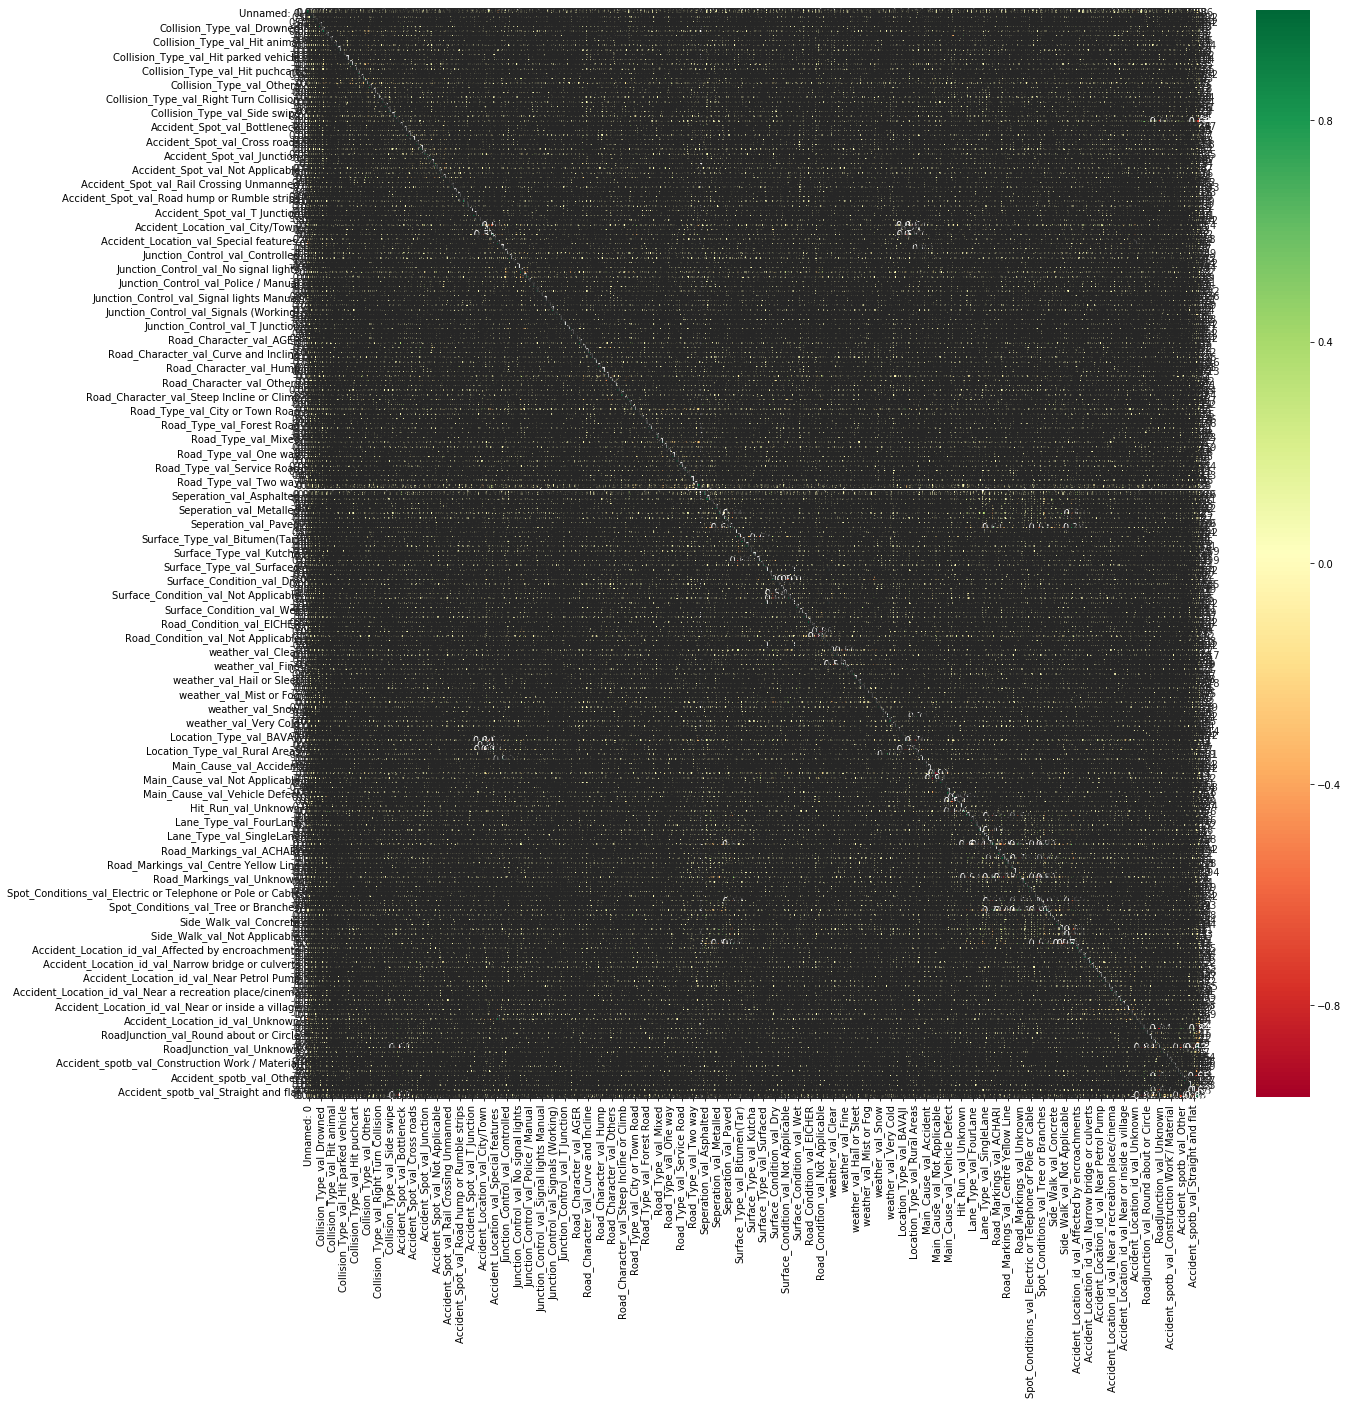

In [33]:
data = df
X = data.iloc[:,0:4]  #independent columns
y = data.iloc[:,-1]    #target column i.e last
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [39]:
corrmat.shape
type(corrmat)

pandas.core.frame.DataFrame

In [49]:
alpha = corrmat

In [143]:
def filter_df(matrix, threshold, max_features):
    num_rows = matrix.shape[0]
    most_correlated_rc= set()
    for index in range(num_rows):
        #print(index)
        print("-----")
        count = 0
        r =0
        c = 0
        for col in range(num_rows):
            if(matrix.iloc[index][col]>threshold and matrix.iloc[index][col]<0.99):
                count+=1
                r = index
                c = col
                print(matrix.iloc[index][col])
                print("$$$")
                print(index)
                print(col)
                
                most_correlated_rc.add(index)
                most_correlated_rc.add(col)
        if(len(most_correlated_rc)>=max_features):
            break
    return most_correlated_rc
    

In [144]:
imp_f = filter_df(alpha,0.5,10)

-----
-----
-----
-----
-----
-----
0.5054381796392001
$$$
5
169
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
0.5369950006911156
$$$
23
215
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
-----
0.8397118979126228
$$$
45
154
-----
0.8897091447474583
$$$
46
155
-----
0.8668647934847603
$$$
47
156


In [147]:
imp_f

{5, 23, 45, 46, 47, 154, 155, 156, 169, 215}

In [150]:
a = [5, 23, 45, 46, 47, 154, 155, 156, 169, 215]
b = alpha.iloc[a,a]


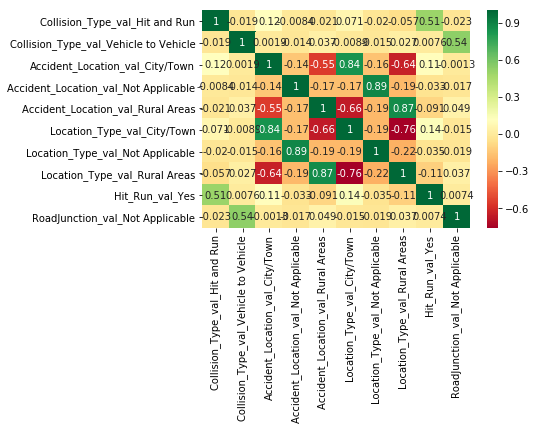

In [152]:
g=sns.heatmap(b,annot=True,cmap="RdYlGn")

In [136]:
alpha.iloc[5]

Unnamed: 0                                                 0.046710
Collision_Type_val_Brown                                  -0.000646
Collision_Type_val_Driver-autorickshaw                    -0.000646
Collision_Type_val_Drowned                                -0.034640
Collision_Type_val_Head on                                -0.097838
Collision_Type_val_Hit and Run                             1.000000
Collision_Type_val_Hit animal                             -0.019349
Collision_Type_val_Hit bicyclist                          -0.047941
Collision_Type_val_Hit fixed object                       -0.030075
Collision_Type_val_Hit parked vehicle                     -0.024212
Collision_Type_val_Hit pedal cyclist                      -0.015724
Collision_Type_val_Hit pedestrian                         -0.095169
Collision_Type_val_Hit puchcart                           -0.016107
Collision_Type_val_Medium                                 -0.000646
Collision_Type_val_Not Applicable               

In [123]:
def get_specific_rc(df, most_correlated_rc):
    new_df = pd.DataFrame()
    for index in most_correlated_rc:
        print(index)
        new_df.add(df.iloc[:index:])
        
    new_df2 = pd.DataFrame()
    for index in most_correlated_rc:
        new_df2.add(new_df.iloc[:,index])
    
    return new_df2

In [124]:
cm = get_specific_rc(alpha,imp_f)

229
5
106
107
45
46
47
50
84
23


IndexError: single positional indexer is out-of-bounds

In [44]:
def colnames():
    col_names = df.columns
    count =0
    for cn in col_names:
        count+=1
        print(count)
        print(cn)

1
Unnamed: 0
2
Collision_Type_val_Brown 
3
Collision_Type_val_Driver-autorickshaw 
4
Collision_Type_val_Drowned
5
Collision_Type_val_Head on
6
Collision_Type_val_Hit and Run
7
Collision_Type_val_Hit animal
8
Collision_Type_val_Hit bicyclist
9
Collision_Type_val_Hit fixed object
10
Collision_Type_val_Hit parked vehicle
11
Collision_Type_val_Hit pedal cyclist
12
Collision_Type_val_Hit pedestrian
13
Collision_Type_val_Hit puchcart
14
Collision_Type_val_Medium
15
Collision_Type_val_Not Applicable
16
Collision_Type_val_Others
17
Collision_Type_val_Overturning
18
Collision_Type_val_Rear end
19
Collision_Type_val_Right Turn Collision
20
Collision_Type_val_Run Off Road
21
Collision_Type_val_Side impact or Right angle
22
Collision_Type_val_Side swipe
23
Collision_Type_val_Skidding or Self accident
24
Collision_Type_val_Vehicle to Vehicle
25
Accident_Spot_val_Bottleneck
26
Accident_Spot_val_Bridge
27
Accident_Spot_val_Circle
28
Accident_Spot_val_Cross roads
29
Accident_Spot_val_Culvert
30
Accide

In [66]:
def get_index_with_df_val(df, val):
    col_names = df.columns
    for col in col_names:
        x = df.loc[df[col] == some_value]
        print(x)
        break


In [67]:
get_index_with_df_val(alpha, 1.0)

NameError: name 'some_value' is not defined